In [1]:
import numpy as np
import pandas as pd

df=pd.read_excel("housing.xls")
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
print(df.head())

      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7  


In [2]:
X=df[['RM']].values
y=df[['MEDV']].values

In [6]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_loss',residual_threshold=5.0,random_state=0)
ransac.fit(X,y)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
inliner_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inliner_mask)
line_X=np.arange(3,10,1)

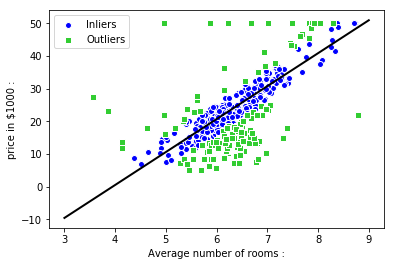

slope : 10.099
Intercept: -40


In [20]:
line_y_ransac=ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inliner_mask],y[inliner_mask],c='blue',edgecolor='white',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolor='white',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='black',lw=2)

plt.xlabel('Average number of rooms :')
plt.ylabel('price in $1000 :')
plt.legend(loc="upper left")
plt.show()

print('slope : %.3f'%ransac.estimator_.coef_[0])
print('Intercept: %3.f'%ransac.estimator_.intercept_)


In [21]:
y_test_pred=ransac.predict(X)
from sklearn.metrics import mean_squared_error
t_test=mean_squared_error(y,y_test_pred)
print("MSE test : %.3f"%t_test)


from sklearn.metrics import r2_score
t_test1=r2_score(y,y_test_pred)
print("R2 score : %.3f"%t_test1)

MSE test : 45.208
R2 score : 0.466
